# Tracing Walkthrough

There are two recommended ways to trace your LangChains:

1. Setting the `LANGCHAIN_WANDB_TRACING` environment variable to "true".
1. Using a context manager with tracing_enabled() to trace a particular block of code.

**Note** if the environment variable is set, all code will be traced, regardless of whether or not it's within the context manager.

In [1]:
import os
os.environ["LANGCHAIN_WANDB_TRACING"] = "true"

# wandb documentation to configure wandb using env variables
# https://docs.wandb.ai/guides/track/advanced/environment-variables
# here we are configuring the wandb project name
os.environ["WANDB_PROJECT"] = "langchain-tracing"

from langchain.agents import initialize_agent, load_tools
from langchain.agents import AgentType
from langchain.llms import OpenAI
from langchain.callbacks import wandb_tracing_enabled

In [2]:
# Agent run with tracing. Ensure that OPENAI_API_KEY is set appropriately to run this example.

llm = OpenAI(temperature=0)
tools = load_tools(["llm-math"], llm=llm)

In [ ]:
agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

agent.run("What is 2 raised to .123243 power?") # this should be traced
# A url with for the trace sesion like the following should print in your console:
# https://wandb.ai/<wandb_entity>/<wandb_project>/runs/<run_id>
# The url can be used to view the trace session in wandb.

In [4]:
# Now, we unset the environment variable and use a context manager.
if "LANGCHAIN_WANDB_TRACING" in os.environ:
    del os.environ["LANGCHAIN_WANDB_TRACING"]

# enable tracing using a context manager
with wandb_tracing_enabled():
    agent.run("What is 5 raised to .123243 power?")  # this should be traced

agent.run("What is 2 raised to .123243 power?")  # this should not be traced



> Entering new AgentExecutor chain...
 I need to use a calculator to solve this.
Action: Calculator
Action Input: 5^.123243
Observation: Answer: 1.2193914912400514
Thought: I now know the final answer.
Final Answer: 1.2193914912400514

> Finished chain.


> Entering new AgentExecutor chain...
 I need to use a calculator to solve this.
Action: Calculator
Action Input: 2^.123243
Observation: Answer: 1.0891804557407723
Thought: I now know the final answer.
Final Answer: 1.0891804557407723

> Finished chain.


'1.0891804557407723'

**Here's a view of wandb dashboard for the above tracing session:**


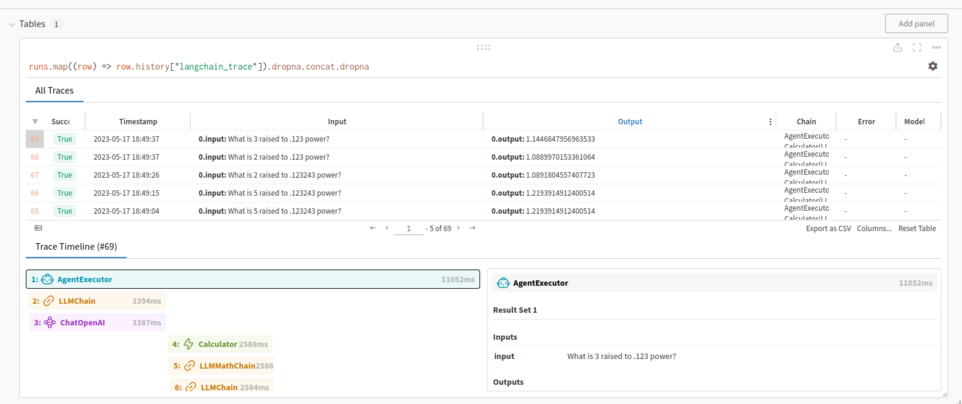

